In [2]:
# importing necessary libraries and setting certain global params
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode , iplot , plot
init_notebook_mode(connected = True)
import cufflinks as cf
cf.go_offline()
plt.style.use("seaborn")
from statsmodels.tools import add_constant
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import (metrics ,linear_model , preprocessing)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import classification_report,accuracy_score,mean_squared_error ,r2_score
from sklearn.model_selection import train_test_split ,cross_val_score , cross_validate , KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LassoLarsIC
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error , r2_score
pd.set_option("display.max_columns", 50)
import warnings
warnings.filterwarnings(action = "ignore" , category = FutureWarning)
from functions import *
import functions as feat

In [3]:
print ('default',os.getcwd())

default /Users/flatironschool/Desktop/london-ds-111819/MY_Class_Edits/projects/Predicting_Life_Expectancy


In [13]:
pd.options.mode.chained_assignment = None

path = 'dataset/Cleaned_health_data.csv'
County_h = pd.read_csv(path)
County_h

,statecode,countycode,fipscode,state,county,year,county_ranked,premature_death_raw_value,adult_smoking_raw_value,adult_obesity_raw_value,food_environment_index_raw_value,physical_inactivity_raw_value,access_to_exercise_opportunities_raw_value,excessive_drinking_raw_value,alcohol_impaired_driving_deaths_raw_value,sexually_transmitted_infections_raw_value,teen_births_raw_value,uninsured_raw_value,primary_care_physicians_raw_value,dentists_raw_value,mental_health_providers_raw_value,preventable_hospital_stays_raw_value,mammography_screening_raw_value,flu_vaccinations_raw_value,high_school_graduation_raw_value,some_college_raw_value,unemployment_raw_value,children_in_poverty_raw_value,income_inequality_raw_value,children_in_single_parent_households_raw_value,social_associations_raw_value,violent_crime_raw_value,injury_deaths_raw_value,air_pollution_particulate_matter_raw_value,drinking_water_violations_raw_value,severe_housing_problems_raw_value,driving_alone_to_work_raw_value,long_commute_driving_alone_raw_value
0,1,1,1001,AL,Autauga County,2019,1.0,8824.057123,0.191247,0.375,7.2,0.311,0.686775,0.168780,0.288136,341.2,26.524208,0.085010,0.000415,0.000324,0.000162,6599.0,0.44,0.41,0.900000,0.608547,0.038635,0.193,4.636664,0.247001,12.631731,272.282220,74.031808,11.7,0.0,0.149546,0.859651,0.383
1,1,3,1003,AL,Baldwin County,2019,1.0,7224.632160,0.167955,0.310,8.0,0.238,0.719710,0.167150,0.318750,338.8,29.594009,0.106993,0.000729,0.000499,0.000912,3833.0,0.45,0.45,0.863616,0.661339,0.039883,0.147,4.518560,0.251841,10.692213,203.660396,69.374289,10.3,1.0,0.138317,0.847194,0.405
2,1,5,1005,AL,Barbour County,2019,1.0,9586.165037,0.215409,0.443,5.6,0.282,0.536257,0.126987,0.296296,557.9,45.092838,0.125132,0.000385,0.000356,0.000079,4736.0,0.46,0.37,0.814103,0.367740,0.059009,0.503,5.755063,0.572157,8.472944,414.277861,72.900134,11.5,0.0,0.154555,0.834044,0.338
3,1,7,1007,AL,Bibb County,2019,1.0,11783.543675,0.199164,0.378,7.6,0.349,0.162514,0.159252,0.272727,302.1,45.454545,0.096801,0.000574,0.000265,0.000088,5998.0,0.44,0.39,0.837638,0.484063,0.043851,0.273,4.254594,0.295654,10.157665,89.349126,100.077937,11.2,0.0,0.109609,0.863659,0.486
4,1,9,1009,AL,Blount County,2019,1.0,10908.101822,0.196522,0.344,8.5,0.285,0.229493,0.153787,0.218750,114.3,35.600555,0.121140,0.000225,0.000207,0.000103,4162.0,0.36,0.38,0.934688,0.544140,0.040214,0.185,4.126883,0.295697,9.011507,482.690611,105.197227,11.7,0.0,0.104012,0.867923,0.597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2468,56,35,56035,WY,Sublette County,2019,1.0,5657.772195,0.144150,0.258,8.3,0.193,0.475847,0.189503,0.444444,111.1,17.478814,0.136450,0.000512,0.000408,0.000510,2508.0,0.35,0.41,0.915966,0.590387,0.043744,0.076,3.094555,0.255266,8.189170,66.030069,80.702108,5.1,1.0,0.060690,0.765296,0.300
2469,56,37,56037,WY,Sweetwater County,2019,1.0,7497.439952,0.175669,0.302,7.7,0.256,0.901452,0.203251,0.333333,221.8,34.261671,0.127509,0.000340,0.000528,0.002297,3289.0,0.34,0.37,0.800676,0.592955,0.045503,0.134,4.393951,0.234619,9.962640,300.494146,85.365634,5.1,1.0,0.095923,0.774592,0.186
2470,56,41,56041,WY,Uinta County,2019,1.0,7790.302043,0.181806,0.318,7.3,0.235,0.813003,0.160586,0.200000,288.2,31.798673,0.125690,0.000385,0.000829,0.003415,3140.0,0.31,0.33,0.846875,0.558918,0.044977,0.118,4.635869,0.216457,5.295335,71.006517,98.020373,5.9,1.0,0.111333,0.774118,0.178
2471,56,43,56043,WY,Washakie County,2019,1.0,5504.650970,0.156076,0.297,8.2,0.260,0.818352,0.163430,0.200000,252.2,27.649770,0.167082,0.000486,0.000744,0.003472,4330.0,0.29,0.43,0.862903,0.601322,0.040826,0.140,3.611459,0.266296,19.429265,78.266105,70.028011,4.8,0.0,0.105413,0.771630,0.106


In [14]:
print('Life Expectancy Data - rows:' , County_h.shape[0],'columns:', County_h.shape[1])

Life Expectancy Data - rows: 2473 columns: 38


In [44]:
County_health = df.copy()

# <span id="3"></span> Removing Raw Value From Columns
#### [Renaming Columns](#0)
<hr/>

In [45]:
cols_dict = County_health.columns.to_list()

In [46]:
cols_dict

['statecode',
 'countycode',
 'fipscode',
 'state',
 'county',
 'year',
 'county_ranked',
 'premature_death_raw_value',
 'adult_smoking_raw_value',
 'adult_obesity_raw_value',
 'food_environment_index_raw_value',
 'physical_inactivity_raw_value',
 'access_to_exercise_opportunities_raw_value',
 'excessive_drinking_raw_value',
 'alcohol_impaired_driving_deaths_raw_value',
 'sexually_transmitted_infections_raw_value',
 'teen_births_raw_value',
 'uninsured_raw_value',
 'primary_care_physicians_raw_value',
 'dentists_raw_value',
 'mental_health_providers_raw_value',
 'preventable_hospital_stays_raw_value',
 'mammography_screening_raw_value',
 'flu_vaccinations_raw_value',
 'high_school_graduation_raw_value',
 'some_college_raw_value',
 'unemployment_raw_value',
 'children_in_poverty_raw_value',
 'income_inequality_raw_value',
 'children_in_single_parent_households_raw_value',
 'social_associations_raw_value',
 'violent_crime_raw_value',
 'injury_deaths_raw_value',
 'air_pollution_particulat

In [50]:
rename = []
for x in County_health.columns:
    if "raw_value" in x:
        rename.append(x.replace('_raw_value',""))
    else :
        rename.append(x)

In [51]:
County_health.columns = rename

In [88]:
County_health

,statecode,countycode,fipscode,state,county,year,county_ranked,premature_death,adult_smoking,adult_obesity,food_environment_index,physical_inactivity,access_to_exercise_opportunities,excessive_drinking,alcohol_impaired_driving_deaths,sexually_transmitted_infections,teen_births,uninsured,primary_care_physicians,dentists,mental_health_providers,preventable_hospital_stays,mammography_screening,flu_vaccinations,high_school_graduation,some_college,unemployment,children_in_poverty,income_inequality,children_in_single_parent_households,social_associations,violent_crime,injury_deaths,air_pollution_particulate_matter,drinking_water_violations,severe_housing_problems,driving_alone_to_work,long_commute_driving_alone
0,1,1,1001,AL,Autauga County,2019,1.0,8824.057123,0.191247,0.375,7.2,0.311,0.686775,0.168780,0.288136,341.2,26.524208,0.085010,0.000415,0.000324,0.000162,6599.0,0.44,0.41,0.900000,0.608547,0.038635,0.193,4.636664,0.247001,12.631731,272.282220,74.031808,11.7,0.0,0.149546,0.859651,0.383
1,1,3,1003,AL,Baldwin County,2019,1.0,7224.632160,0.167955,0.310,8.0,0.238,0.719710,0.167150,0.318750,338.8,29.594009,0.106993,0.000729,0.000499,0.000912,3833.0,0.45,0.45,0.863616,0.661339,0.039883,0.147,4.518560,0.251841,10.692213,203.660396,69.374289,10.3,1.0,0.138317,0.847194,0.405
2,1,5,1005,AL,Barbour County,2019,1.0,9586.165037,0.215409,0.443,5.6,0.282,0.536257,0.126987,0.296296,557.9,45.092838,0.125132,0.000385,0.000356,0.000079,4736.0,0.46,0.37,0.814103,0.367740,0.059009,0.503,5.755063,0.572157,8.472944,414.277861,72.900134,11.5,0.0,0.154555,0.834044,0.338
3,1,7,1007,AL,Bibb County,2019,1.0,11783.543675,0.199164,0.378,7.6,0.349,0.162514,0.159252,0.272727,302.1,45.454545,0.096801,0.000574,0.000265,0.000088,5998.0,0.44,0.39,0.837638,0.484063,0.043851,0.273,4.254594,0.295654,10.157665,89.349126,100.077937,11.2,0.0,0.109609,0.863659,0.486
4,1,9,1009,AL,Blount County,2019,1.0,10908.101822,0.196522,0.344,8.5,0.285,0.229493,0.153787,0.218750,114.3,35.600555,0.121140,0.000225,0.000207,0.000103,4162.0,0.36,0.38,0.934688,0.544140,0.040214,0.185,4.126883,0.295697,9.011507,482.690611,105.197227,11.7,0.0,0.104012,0.867923,0.597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2468,56,35,56035,WY,Sublette County,2019,1.0,5657.772195,0.144150,0.258,8.3,0.193,0.475847,0.189503,0.444444,111.1,17.478814,0.136450,0.000512,0.000408,0.000510,2508.0,0.35,0.41,0.915966,0.590387,0.043744,0.076,3.094555,0.255266,8.189170,66.030069,80.702108,5.1,1.0,0.060690,0.765296,0.300
2469,56,37,56037,WY,Sweetwater County,2019,1.0,7497.439952,0.175669,0.302,7.7,0.256,0.901452,0.203251,0.333333,221.8,34.261671,0.127509,0.000340,0.000528,0.002297,3289.0,0.34,0.37,0.800676,0.592955,0.045503,0.134,4.393951,0.234619,9.962640,300.494146,85.365634,5.1,1.0,0.095923,0.774592,0.186
2470,56,41,56041,WY,Uinta County,2019,1.0,7790.302043,0.181806,0.318,7.3,0.235,0.813003,0.160586,0.200000,288.2,31.798673,0.125690,0.000385,0.000829,0.003415,3140.0,0.31,0.33,0.846875,0.558918,0.044977,0.118,4.635869,0.216457,5.295335,71.006517,98.020373,5.9,1.0,0.111333,0.774118,0.178
2471,56,43,56043,WY,Washakie County,2019,1.0,5504.650970,0.156076,0.297,8.2,0.260,0.818352,0.163430,0.200000,252.2,27.649770,0.167082,0.000486,0.000744,0.003472,4330.0,0.29,0.43,0.862903,0.601322,0.040826,0.140,3.611459,0.266296,19.429265,78.266105,70.028011,4.8,0.0,0.105413,0.771630,0.106


In [53]:
# Check results
County_health.columns

Index(['statecode', 'countycode', 'fipscode', 'state', 'county', 'year',
       'county_ranked', 'premature_death', 'adult_smoking', 'adult_obesity',
       'food_environment_index', 'physical_inactivity',
       'access_to_exercise_opportunities', 'excessive_drinking',
       'alcohol_impaired_driving_deaths', 'sexually_transmitted_infections',
       'teen_births', 'uninsured', 'primary_care_physicians', 'dentists',
       'mental_health_providers', 'preventable_hospital_stays',
       'mammography_screening', 'flu_vaccinations', 'high_school_graduation',
       'some_college', 'unemployment', 'children_in_poverty',
       'income_inequality', 'children_in_single_parent_households',
       'social_associations', 'violent_crime', 'injury_deaths',
       'air_pollution_particulate_matter', 'drinking_water_violations',
       'severe_housing_problems', 'driving_alone_to_work',
       'long_commute_driving_alone'],
      dtype='object')

# <a id='7'>Life Expectancy By States In the US<a/>

In [54]:
County_health.iplot(kind = "bar" , x = "state" , y = "premature_death" , xTitle = "County Name" ,
         yTitle = "Life Expectency" , title = "Life Expectancy Of States")

# Interactive Map Of USA Showing Life Expectancy

In [65]:
# The data dict
data = dict(type='choropleth',
            colorscale = 'ylorbr', # random selection - Yellow-Orange-Red
            locations = County_health['state'], # passing column with state codes
            locationmode = 'USA-states',
            z = County_health['premature_death'], # What the color nar will represent
            text = County_health['premature_death'], # Newly generated column to hover 
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Millions"}
            ) 

# And our layout dictionary with some more arguments:
layout = dict(title = '2019 US Life Expectancy by State',
              geo = dict(scope='usa',
                         showlakes = True, # we want actual lake on the map
                         lakecolor = 'rgb(85,173,240)') # blue for lakes
             )

# Passing data and layout to the go.Figure 
choromap = go.Figure(data = [data],layout = layout)
# Passing map to iplot for plotting 
iplot(choromap)

In [ ]:
# df = df1.copy() # in case we mess something up along the line

# <a id='7'>Getting Numberical And Categorical Columns<a/>

In [96]:
def get_cat(County_health):
    """get list of cat features from df"""
    cat = []
    for x in County_health.columns:
        if County_health[x].dtypes == 'object':
            cat.append(x)
    return cat

cat1 = get_cat(County_health)


In [97]:
cat1

['state', 'county']

In [98]:
def get_nom(County_health):
    """get nom features"""
    nom = []
    for x in County_health.columns:
        if County_health[x].dtypes != 'object':
            nom.append(x)
    return nom[2:] # no need for feature id and age but customise according to df

nom1 = get_nom(County_health)


In [99]:
nom1

['fipscode',
 'year',
 'county_ranked',
 'premature_death',
 'adult_smoking',
 'adult_obesity',
 'food_environment_index',
 'physical_inactivity',
 'access_to_exercise_opportunities',
 'excessive_drinking',
 'alcohol_impaired_driving_deaths',
 'sexually_transmitted_infections',
 'teen_births',
 'uninsured',
 'primary_care_physicians',
 'dentists',
 'mental_health_providers',
 'preventable_hospital_stays',
 'mammography_screening',
 'flu_vaccinations',
 'high_school_graduation',
 'some_college',
 'unemployment',
 'children_in_poverty',
 'income_inequality',
 'children_in_single_parent_households',
 'social_associations',
 'violent_crime',
 'injury_deaths',
 'air_pollution_particulate_matter',
 'drinking_water_violations',
 'severe_housing_problems',
 'driving_alone_to_work',
 'long_commute_driving_alone']

# <a id='7'>Heatmap To Show Distribution of data<a/>

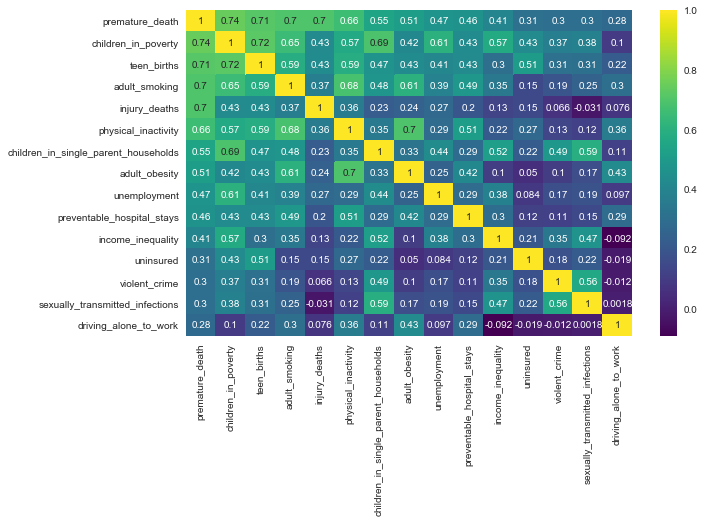

In [100]:
Target = 'premature_death'
k = 15
cols = County_health[nom1].corr().nlargest(k , Target)[Target].index
cm = County_health[cols].corr()
plt.figure(figsize = (10, 6))
sns.heatmap(cm , annot = True , cmap = 'viridis')

# Observation

Now on looking at the above heatmap we can see some features have very high values . Hence the rule of Multicollinearity
may apply . Once there are highly correlated features usually above the threshold of 0.64 we need to drop those features


# Checking for highly correlated variables

In [101]:
used = []
corrs = []
for i, j in enumerate(df.corr().columns):
    for k in range(len(df.corr())):
        if ((df.corr().iloc[k, i] > 0.6) &
            (j not in used) &
            (j != df.corr().index[k])):
            
            used.append(j)
            corrs.append((j, df.corr().index[k],
                         np.round(df.corr().iloc[k, i], 2)))
        
corrsdf = pd.DataFrame([[i[0] for i in corrs],
                       [i[1] for i in corrs],
                       [i[2] for i in corrs]])

corrsdf = corrsdf.T.rename(columns = {0:'column', 1:'row', 2:'corr'})
corrsdf[:15]

,column,row,corr
0,statecode,fipscode,1
1,fipscode,statecode,1
2,premature_death_raw_value,adult_smoking_raw_value,0.7
3,adult_smoking_raw_value,premature_death_raw_value,0.7
4,adult_obesity_raw_value,adult_smoking_raw_value,0.61
5,physical_inactivity_raw_value,premature_death_raw_value,0.66
6,teen_births_raw_value,premature_death_raw_value,0.71
7,primary_care_physicians_raw_value,dentists_raw_value,0.62
8,dentists_raw_value,primary_care_physicians_raw_value,0.62
9,unemployment_raw_value,children_in_poverty_raw_value,0.61


# <a id='7'>Modelling<a/>

In [102]:
# defining the target column and and columns of non-feature data
target_var = ["premature_death"]
cat_vars = ["statecode", "countycode", "fipscode","state", "county", "year", "county_ranked"]
feature_vars = list(County_health.columns)[8:]

# <a id='7'>Creating training and testing data<a/>

In [110]:
target = County_health[target_var]
features = County_health.drop(columns=cat_vars+target_var)

X_train1, X_test1, y_train, y_test = train_test_split(features, target, random_state=12, test_size=.2)

In [111]:
# creating a single training data set for use with some functions
train_df = pd.merge(y_train, X_train1, left_index=True, right_index=True)

In [112]:
print(X_train1.shape)
print(y_train.shape)
print(X_test1.shape)
print(y_test.shape)

(1978, 30)
(1978, 1)
(495, 30)
(495, 1)


# <a id='7'>Building a Baseline Model<a/>
The Baseline model is an ordinary least squares (OLS) regression fit to all 30 non-standardized Health Factors provided by the Robert Wood Johnson Foundation with a target of Premature Death.

In [114]:
formula_baseline = target_var[0] + '~' + '+'.join(feature_vars)
model_baseline = ols(formula = formula_baseline , data = train_df)
results_baseline = model_baseline.fit()
results_baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        premature_death   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     368.2
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        21:30:56   Log-Likelihood:                -16295.
No. Observations:                1978   AIC:                         3.265e+04
Df Residuals:                    1947   BIC:                         3.282e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                            -3972.6721    768.014     -5.173      0.000   -5478.888   -2466.456
adult_smoking                         8524.9713   1047.120      8.141      0.000    6471.376    1.06e+04
adult_obesity                         1557.3197    747.498      2.083      0.037      91.339    3023.301
food_environment_index                -146.1671     35.574     -4.109      0.000    -215.933     -76.401
physical_inactivity                   3380.0388    759.798      4.449      0.000    1889.935    4870.142
access_to_exercise_opportunities      -135.8521    141.248     -0.962      0.336    -412.866     141.161
excessive_drinking                   -5227.9491    948.991     -5.509      0.000   -7089.094   -3366.805
alcohol_impaired_driving_deaths        363.7655    182.517      1.993      0.046       5.816     721.716
sexually_transmitted_infections          0.7603      0.153      4.954      0.000       0.459       1.061
teen_births                             24.4380      2.890      8.455      0.000      18.769      30.107
uninsured                             1324.2286    660.963      2.003      0.045      27.960    2620.497
primary_care_physicians              -6.149e+04   9.49e+04     -0.648      0.517   -2.48e+05    1.25e+05
dentists                               1.39e+04   1.25e+05      0.111      0.912   -2.32e+05     2.6e+05
mental_health_providers               4.435e+04   1.78e+04      2.488      0.013    9393.457    7.93e+04
preventable_hospital_stays               0.0364      0.016      2.339      0.019       0.006       0.067
mammography_screening                 -330.6416    415.591     -0.796      0.426   -1145.692     484.409
flu_vaccinations                       543.6051    315.933      1.721      0.085     -75.997    1163.207
high_school_graduation                1248.4744    354.054      3.526      0.000     554.109    1942.840
some_college                           859.5299    342.856      2.507      0.012     187.127    1531.933
unemployment                          7120.5756   1949.761      3.652      0.000    3296.737    1.09e+04
children_in_poverty                   2679.4263    632.654      4.235      0.000    1438.675    3920.177
income_inequality                      162.6774     43.001      3.783      0.000      78.345     247.010
children_in_single_parent_households  1765.2377    383.788      4.600      0.000    1012.559    2517.916
social_associations                     -9.1883      4.771     -1.926      0.054     -18.545       0.168
violent_crime                            0.2723      0.141      1.925      0.054      -0.005       0.550
injury_deaths                           47.2564      1.218     38.800      0.000      44.868      49.645
air_pollution_particulate_matter      

In [116]:
print('Baseline Model Results')
print('RMSE (Root Mean Squared Error) : ', results_baseline.mse_resid**0.5)
print('R-squared : ', results_baseline.rsquared_adj.round(3))

Baseline Model Results
RMSE (Root Mean Squared Error) :  922.2707010424114
R-squared :  0.848


# <a id='7'>Cross Validation for Baseline Model<a/>

In [120]:
print("Cross Validation for Baseline Model")
baseline_reg = LinearRegression()
baseline = cross_val_score(baseline_reg, X_train1, y_train, cv=5)
print(np.mean(baseline))
print(np.std(baseline))

Cross Validation for Baseline Model
0.8430898097261265
0.005077566652546612


### Observation :
The performance of the baseline model is good, but we'd like to improve or maintain the performance with significantly fewer features to explain the most impactful features that should be the focus.

# <a id='7'>Generating standardized data sets as dataframes<a/>

In [122]:
ss = MinMaxScaler()
ss.fit(X_train1)

X_train = ss.transform(X_train1)
X_test = ss.transform(X_test1)

X_train = pd.DataFrame(X_train, columns = feature_vars, index = X_train1.index)
X_test = pd.DataFrame(X_test, columns = feature_vars, index = X_test1.index)

In [123]:
# creating training dataset with the standardized data
train_new1 = pd.merge(y_train, X_train, left_index=True, right_index=True)

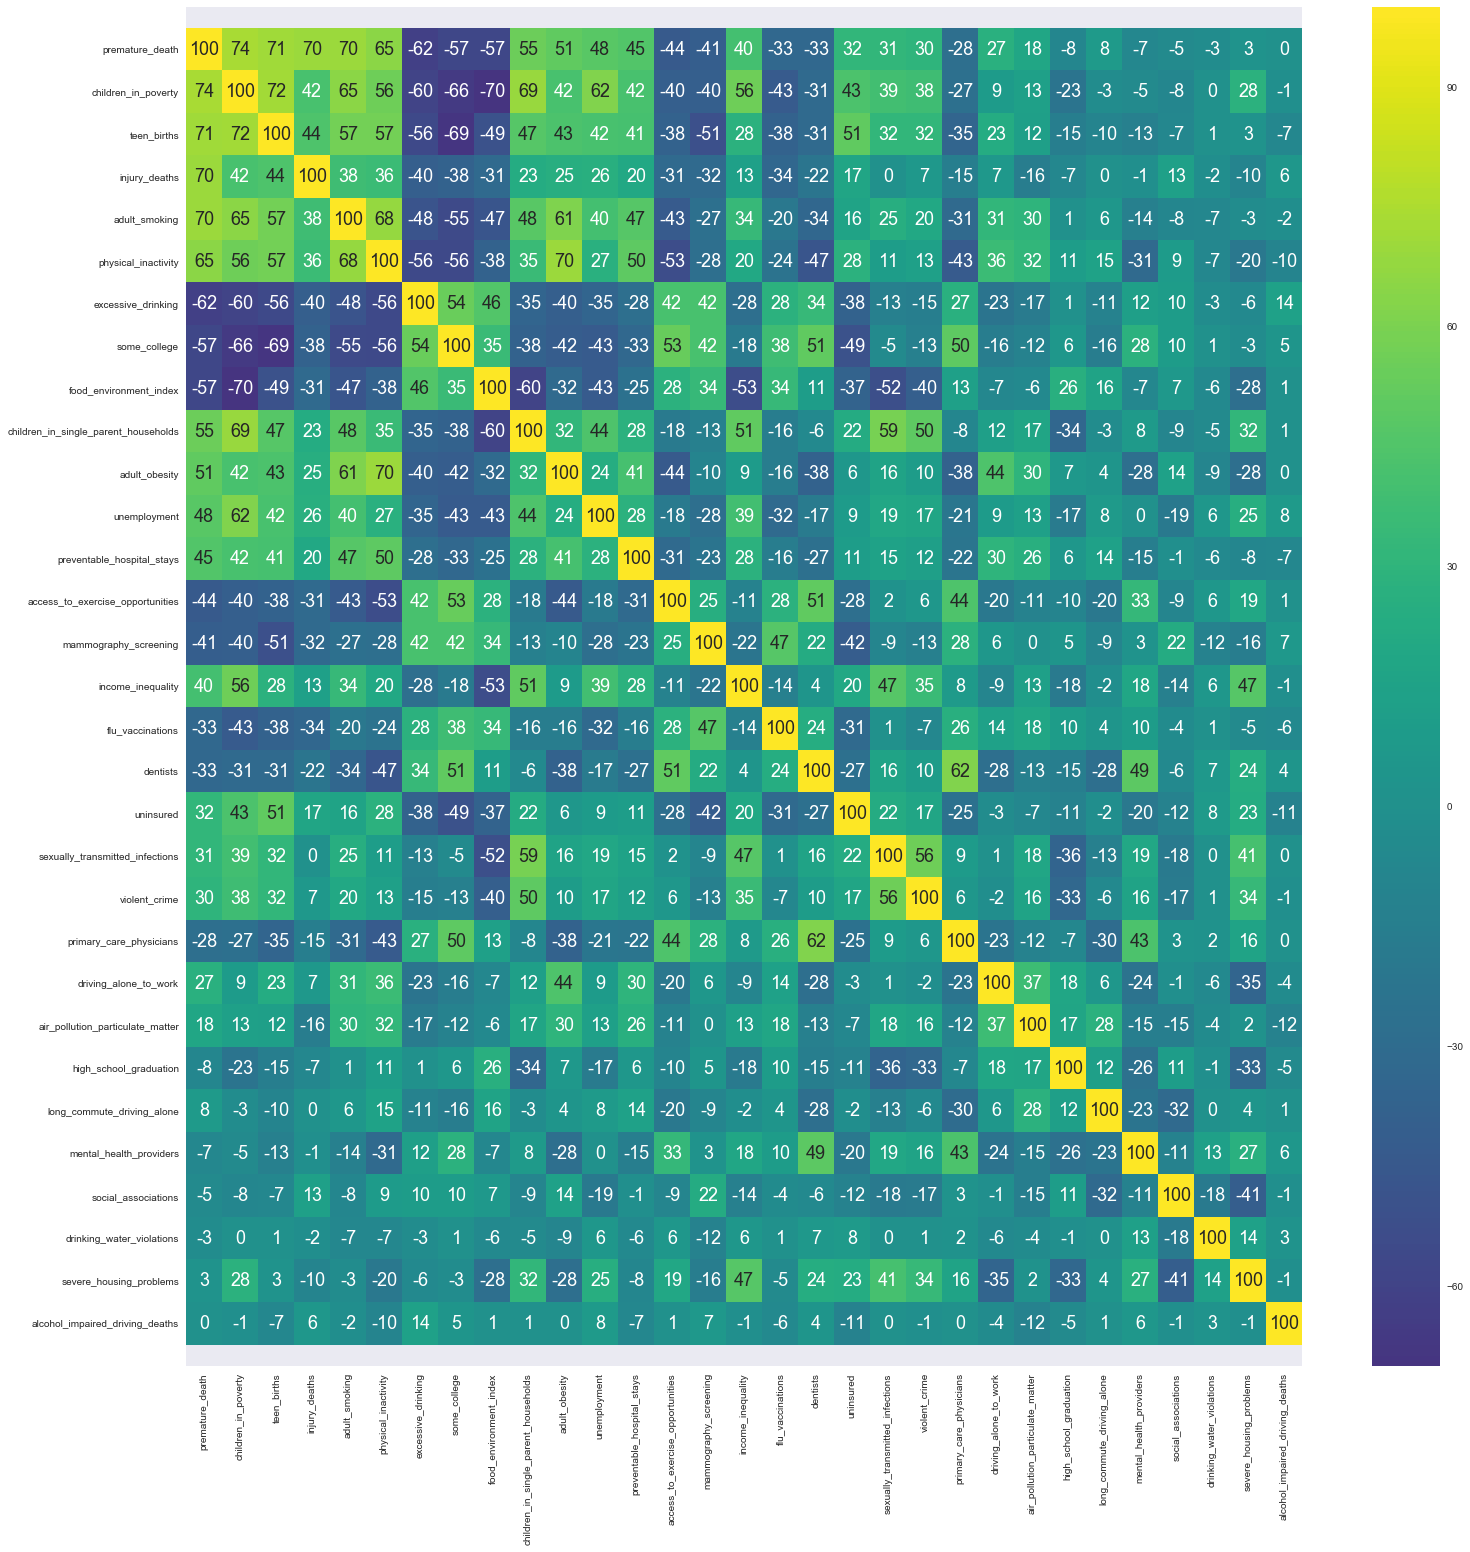

In [125]:
# creating the sort order
sorted_corr_series = train_new1.corr().premature_death.abs().sort_values(ascending=False)
sorted_cols = list(sorted_corr_series.index)

# to allow for larger font sizes,
# the correlations are being rounded and multiplied by 100
sorted_corr_df = train_new1[sorted_cols].corr().round(2)*100

plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(figsize = (25, 25))

sns.heatmap(sorted_corr_df.astype(int),
           center = 0, annot = True, fmt="d" , cmap = 'viridis')

# a bug in the current version of matplotlib shifts the default ylim,
# and the code below corrects it
ax.set_ylim(len(target_var+feature_vars)+0.5, -0.5);

In [126]:
## Correlation between Features
corr_data = train_new1.corr()['premature_death'].sort_values(ascending = False)
print(corr_data.tail)

<bound method NDFrame.tail of premature_death                         1.000000
children_in_poverty                     0.738289
teen_births                             0.707047
injury_deaths                           0.702457
adult_smoking                           0.695879
physical_inactivity                     0.647399
children_in_single_parent_households    0.553102
adult_obesity                           0.512692
unemployment                            0.477808
preventable_hospital_stays              0.452075
income_inequality                       0.399789
uninsured                               0.321818
sexually_transmitted_infections         0.314778
violent_crime                           0.299763
driving_alone_to_work                   0.272376
air_pollution_particulate_matter        0.181920
long_commute_driving_alone              0.078952
severe_housing_problems                 0.027755
alcohol_impaired_driving_deaths         0.004077
drinking_water_violations              

In [127]:
# Remove Multicollinear features
def remove_collinear(x1 , threshold):
    
    y1 = x1['premature_death']
    x1 = x1.drop(columns = ['premature_death'])
    
    #calc the correlation matrix
    corr_matrix = x1.corr()
    elements = range(len(corr_matrix.columns) - 1)
    drop_cols = []
    
    # Iterate through cor matrix and compare correlations
    for s in elements:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1) , (s+1):(s+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # if corr exceeds threshold
            if val >= threshold:
                drop_cols.append(col.values[0])
                
    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x1 = x1.drop(columns = drops)
    
    # Add the score back into the data
    x1['premature_death'] = y1
    
    return x1

In [119]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

cros_val = KFold(n_splits=10, random_state=1, shuffle=True)
scaler = StandardScaler()
y = County_health['premature_death']

xset = County_health.drop(['statecode','countycode','fipscode','state','county','year',"county_ranked",'premature_death',],axis=1)
xset = xset.select_dtypes(exclude=['object'])
X = scaler.fit_transform(xset)


linreg = LinearRegression()
baseline = np.mean(cross_val_score(linreg,X,y,scoring='r2',cv=cros_val))

print("Cross Validation for Baseline Model :" , baseline)

Cross Validation for Baseline Model : 0.8413363139530438


# <a  id='7'>Exploring Multicollinearity<a/>

In [ ]:
def variance_inflation_factor(feature_list, DataFrame):
    """
    Passes the inputs into statsmodel's variance_inflation_factor function.
    Returns a DataFrame with each feature and its variance inflation factor.
    """
    feature_df = DataFrame[feature_list]
    vif = [variance_inflation_factor(feature_df.values, i)
           for i in range(feature_df.shape[1])]
    data = list(zip(feature_list, vif))
    data_df = pd.DataFrame(data, columns=['Feature','VIF'])
    return data_df